Part II: the mutli-layer perceptron 

Generate Dataset

In [1]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import OneHotEncoder
import numpy as np

#X, y = make_moons(n_samples=1000, shuffle=True, noise=0.4, random_state=42)
X, y = make_moons(n_samples=[750, 250], shuffle=True, noise=0.2, random_state=42)

one_hot_encode = OneHotEncoder(sparse=False)
y_onehot = one_hot_encode.fit_transform(y.reshape(-1,1))

c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Plot Dataset

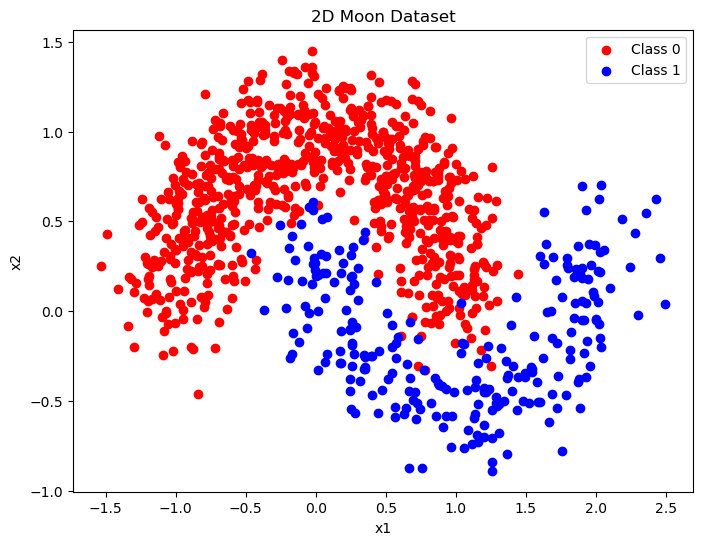

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('2D Moon Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

Task 2: Split dataset into training and testing set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)


Implement MLP models

In [6]:
from mlp_numpy import MLP
from train_mlp_numpy import accuracy, train

# default parameters
dnn_hidden_units = '20'
learning_rate = 1e-2
max_steps = 1500
eval_freq = 10
mode = 'batch'
#mode = 'mini-batch'
#mode = 'stochastic'
batch_size = 1000


Train the models

In [7]:

losses, accuracies = train(X_train, y_train, X_test, y_test, dnn_hidden_units, learning_rate, max_steps, eval_freq, mode, batch_size)


using batch gradient descent
Step: 0, Loss: 1.602293423882677, Accuracy: 74.5
Step: 10, Loss: 0.3683186189355235, Accuracy: 83.0
Step: 20, Loss: 0.5026151061581978, Accuracy: 73.5
Step: 30, Loss: 0.45099171819106926, Accuracy: 79.0
Step: 40, Loss: 0.3785726334461696, Accuracy: 81.0
Step: 50, Loss: 0.36844272875908574, Accuracy: 83.0
Step: 60, Loss: 0.36362621178093696, Accuracy: 83.0
Step: 70, Loss: 0.35997994988741366, Accuracy: 83.5
Step: 80, Loss: 0.3583863917091914, Accuracy: 83.5
Step: 90, Loss: 0.35054453990197715, Accuracy: 83.0
Step: 100, Loss: 0.3476363108652341, Accuracy: 83.0
Step: 110, Loss: 0.3440365865516948, Accuracy: 83.0
Step: 120, Loss: 0.3497326672211924, Accuracy: 83.0
Step: 130, Loss: 0.3425779399035514, Accuracy: 83.5
Step: 140, Loss: 0.34860341807976025, Accuracy: 83.0
Step: 150, Loss: 0.3450758879002611, Accuracy: 83.5
Step: 160, Loss: 0.3467898319671404, Accuracy: 83.0
Step: 170, Loss: 0.3467291685005612, Accuracy: 83.0
Step: 180, Loss: 0.34358334717107447, Acc

Plot the Testing Loss and Accuracy over steps

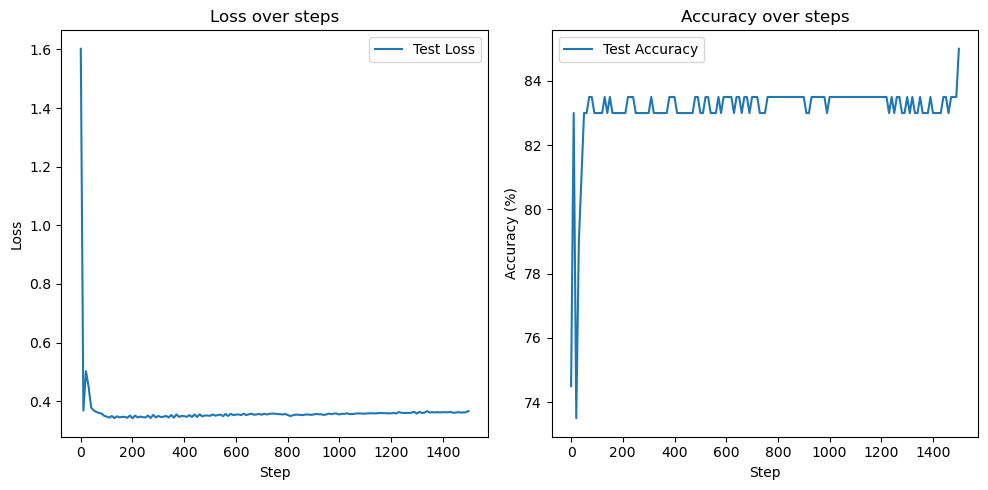

In [8]:
import matplotlib.pyplot as plt

# Plotting the loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# Generate a range that matches the length of the losses array
steps = range(0, len(losses) * eval_freq, eval_freq)
plt.plot(steps, losses, label='Test Loss')
plt.title('Loss over steps')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
# Use the same steps range as for losses
plt.plot(steps, accuracies, label='Test Accuracy')
plt.title('Accuracy over steps')
plt.xlabel('Step')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()
